In [45]:
from apiclient.discovery import build #pip install google-api-python-client
from apiclient.errors import HttpError #pip install google-api-python-client
from oauth2client.tools import argparser #pip install oauth2client


* ## data api filtering by specific topic

In [ ]:
#youtube loop


from apiclient.discovery import build #pip install google-api-python-client
from apiclient.errors import HttpError #pip install google-api-python-client
from oauth2client.tools import argparser #pip install oauth2client
import numpy as np
import json
from pymongo import MongoClient

DEVELOPER_KEY = ""  #the key of the data api was took on the google 
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"
token = ""    #this token is set to get the data from next page 

def youtube_search (options):
    youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION,
    developerKey=DEVELOPER_KEY) 
  # Call the search.list method to retrieve results matching the specified
  # query term.               #add the list
    search_response = youtube.search().list(    
    q=options["q"],                      
    part="id,snippet",
    maxResults=options["max_results"],
    pageToken = options["token"]
  ).execute()
    #the token here is about the next page, the current token was replaced by the nextpage token every loop
    videos = []
    channels = []
    playlists = []
  # Add each result to the appropriate list, and then display the lists of
  # matching videos, channels, and playlists.
    for search_result in search_response.get("items", []):
        client = MongoClient()
        db = client.youtube
        db.youtube.insert(search_result)         # insert into mongodb, named youtube
        if search_result["id"]["kind"] == "youtube#video":
            videos.append("%s (%s)" % (search_result["snippet"]["title"],
                                 search_result["id"]["videoId"]))
        elif search_result["id"]["kind"] == "youtube#channel":
            channels.append("%s (%s)" % (search_result["snippet"]["title"],
                                   search_result["id"]["channelId"]))
        elif search_result["id"]["kind"] == "youtube#playlist":
            playlists.append("%s (%s)" % (search_result["snippet"]["title"],
                                    search_result["id"]["playlistId"]))

    print ("Videos:\n", "\n".join(videos), "\n")
    print ("Channels:\n", "\n".join(channels), "\n")
    print ("Playlists:\n", "\n".join(playlists), "\n")
    token = search_response.get("nextPageToken")  
   # print(token)
   # print(search_response.get("prevPageToken") )
    return token
    
if __name__ == "__main__":
   
    keywords = np.array(['whisky', 'wine', 'beer', 'spirit', 'ale', 'brandy', 'rum'])
    while token !=None:
        for i in range (keywords.shape[0]):
            try:    
                args={"q":keywords[i],"max_results":50,"token":token}
                token = youtube_search(args)
                
            except HttpError as e:
                print ("An HTTP error %d occurred:\n%s" % (e.resp.status, e.content))

* ## Searching data from Glasgow

In [ ]:
from apiclient.discovery import build #pip install google-api-python-client
from apiclient.errors import HttpError #pip install google-api-python-client
from oauth2client.tools import argparser #pip install oauth2client
import json
from pymongo import MongoClient

DEVELOPER_KEY = ""
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"
token = ""

def youtube_search (options):
    youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION,
    developerKey=DEVELOPER_KEY)
  # Call the search.list method to retrieve results matching the specified
  # query term.
    search_response = youtube.search().list(
    q=options['q'],
    part='id,snippet',
    maxResults=options['max_results'],
    type='video',
    location=options['location'],
    locationRadius=options['location_radius'],
    pageToken = options["token"],
  ).execute()

    videos = []
    channels = []
    playlists = []
  # Add each result to the appropriate list, and then display the lists of
  # matching videos, channels, and playlists.
    for search_result in search_response.get("items", []):
        client = MongoClient()
        db = client.youtube
        db.youtubelocation.insert(search_result)     # insert into mongodb
        if search_result["id"]["kind"] == "youtube#video":
            videos.append("%s (%s)" % (search_result["snippet"]["title"],
                                 search_result["id"]["videoId"]))
        elif search_result["id"]["kind"] == "youtube#channel":
            channels.append("%s (%s)" % (search_result["snippet"]["title"],
                                   search_result["id"]["channelId"]))
        elif search_result["id"]["kind"] == "youtube#playlist":
            playlists.append("%s (%s)" % (search_result["snippet"]["title"],
                                    search_result["id"]["playlistId"]))

    print ("Videos:\n", "\n".join(videos), "\n")
    print ("Channels:\n", "\n".join(channels), "\n")
    print ("Playlists:\n", "\n".join(playlists), "\n")
    token = search_response.get("nextPageToken")  
   # print(token)
   # print(search_response.get("prevPageToken") )
    return token
    
if __name__ == "__main__":
   
    #args={"q":"whisky","max_results":50,"token":token}
    while token !=None:
        try:    
            args={"q":"","max_results":50,"location":"55.862125, -4.255981","token":token ,"location_radius":"70km"}
            token = youtube_search(args)
                
        except (HttpError, e):
             print ("An HTTP error %d occurred:\n%s" % (e.resp.status, e.content))

* ## statistics

In [4]:
##    statistics
from pymongo import MongoClient
client = MongoClient()
db = client.youtube
print(db.youtube.find().count())
iterator = db.youtube.aggregate([ { "$group": {"_id": "$videoid"}}])
i = 0
for redundant in iterator:
    i+=1
print(db.youtube.count()-i)
print(db.youtubelocation.find().count())
iterator = db.youtubelocation.aggregate([{ "$group": {"_id": "$videoid"}}])
i = 0
for redundant in iterator:
    i = i+1
print(db.youtubelocation.count()-i)

4108
4107
640
639


D:\python\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """
D:\python\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  # Remove the CWD from sys.path while we load stuff.
D:\python\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  # This is added back by InteractiveShellApp.init_path()
D:\python\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $ge

In [63]:
from pymongo import MongoClient
client = MongoClient()
db = client.youtube
print(db.youtubeall.find().count())
iterator = db.youtubeall.aggregate([ { "$group": {"_id": "$videoid"}}])
i = 0
for redundant in iterator:
    i+=1
print(db.youtubeall.find().count()-i)

D:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  after removing the cwd from sys.path.


4748


D:\python\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if __name__ == '__main__':


4747


In [ ]:
#argparser.add_argument("--q", help="Search term", default="Google")
#argparser.add_argument("--location", help="Location", default="37.42307,-122.08427")
#argparser.add_argument("--location-radius", help="Location radius", default="5km")
#argparser.add_argument("--max-results", help="Max results", default=25)
#args = argparser.parse_args()                                        the parameters in this method

* aggregate

In [64]:
iterator = db.youtubeall.aggregate([ { "$group": {"_id": "$videoid"}}])
i = 0
for redundant in iterator:
    i+=1
print(i)

1


In [36]:
import numpy as np
from pymongo import MongoClient
client = MongoClient()
db = client.youtube
videotype = np.zeros(3)
videotype[0]=db.youtubeall.find({"id.kind":"youtube#video"}).count()
videotype[1]=db.youtubeall.find({"id.kind":"youtube#channel"}).count()
videotype[2]=db.youtubeall.find({"id.kind":"youtube#playlist"}).count()
print(db.youtubeall.find({"id.kind":"youtube#video"}).count())
print(db.youtubeall.find({"id.kind":"youtube#channel"}).count())
print(db.youtubeall.find({"id.kind":"youtube#playlist"}).count())
print(videotype)

4215
495
38
[4215.  495.   38.]


D:\python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  import sys
D:\python\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if __name__ == '__main__':
D:\python\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  # Remove the CWD from sys.path while we load stuff.
D:\python\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5,1,'different types of youtube data')

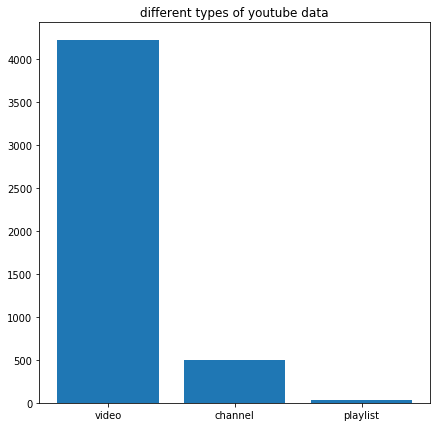

In [44]:

import matplotlib as mpl   
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(1,1,1)
ax.bar(range(len(videotype)),videotype)
ax.set_xticks(range(len(videotype)))
ax.set_xticklabels(["video","channel","playlist"])
ax.set_title("different types of youtube data")

In [46]:
##grouping step


import spacy
from spacy import displacy
from collections import Counter

import en_core_web_sm



client = MongoClient()
db = client.youtube
                                                            
mycol = db.youtubeall
sets = mycol.find()

nlp = en_core_web_sm.load()             #load the word database
                            
for set in sets:
    doc = nlp(set['snippet']['title'])

    i1 = 0
    i2 = 0
    i3 = 0
                        #set the organization, person and location elements
    orgstr = ""
    locstr = ""
    pstr = ""


    for X in doc.ents:
        str = X.label_
        if ord(X.text[0])>64 and ord(X.text[0])<123:
            if (str is "ORG"):
                if(i1==0):
                    orgstr = X.text.lower()
                    i1==1

            elif (str is "LOC"):
                if(i2==0):
                    locstr =  X.text.lower()
                    i2=1

            elif (str is "PERSON"):
                if(i3==0):
                    pstr = X.text.lower()
                    i3=1





    if (orgstr is not "") or (locstr is not "") or (pstr is not ""):
        id=set['id']

        db.new.insert_one({"id":id,"ORG": orgstr,"LOC": locstr,"PERSON": pstr,"TagNum": 0,"ORGTAG":0,"PTAG":0,"LOCTAG":0,"Amount":0})


In [47]:
#implement the algorithm

import operator

mycol = db.new
DISTANCE = 10000

client = MongoClient()
db = client.youtube


orglist = []
personlist = []
loclist = []


DATASET= db.new.aggregate([{"$group":{"_id":"$PERSON"}}])
for data in DATASET:
    if not operator.eq(data['_id'],""):
        personlist.append(data['_id'])              
print(len(personlist))

DATASET= db.new.aggregate([{"$group":{"_id":"$ORG"}}])
for data in DATASET:
    if not operator.eq(data['_id'], ""):
        orglist.append(data['_id'])
print(len(orglist))

DATASET= db.new.aggregate([{"$group":{"_id":"$LOC"}}])
for data in DATASET:
    if not operator.eq(data['_id'], ""):
        loclist.append(data['_id'])
print(len(loclist))


x1 = 0
x2 = DISTANCE
x3 = DISTANCE * 2
x4 = DISTANCE * 3

orgONE = []
personONE = []
locONE = []

myquery = {"TagNum": {'$ne':0}}
newvalues = {"$set": {"TagNum": 0,"ORGTAG":0,"PTAG":0,"LOCTAG":0}}
mycol.update_many(myquery, newvalues)



for i in range(len(orglist)):
    ones = db.new.find()
    for one in ones:
        if (operator.eq(one['ORG'],orglist[i])):
            orgONE.append(orglist[i])
            #orgID.append(one['_id'])
            myquery = {"_id": one['_id']}                            
            t=one['TagNum']+1
            newvalues = {"$set": {"NG": x1,"ORGTAG":1,"TagNum":t}}
            db.new.update_many(myquery, newvalues)
    x1 = x1 + 1
print("org",x1)

for i in range(len(personlist)):
    # print("list ",list[i])
    ones = db.new.find()
    for one in ones:
        if (operator.eq(one['PERSON'],personlist[i])):
            personONE.append(personlist[i])
            #personID.append(one['_id'])
            myquery = {"_id": one['_id']}
            t = one['TagNum'] + 1
            newvalues = {"$set": {"NG": x2,"PTAG":1,"TagNum":t}}
            db.new.update_many(myquery, newvalues)
    x2 = x2 + 1
print("person",x2)

for i in range(len(loclist)):
    ones = db.new.find()
    for one in ones:
        if (operator.eq(one['LOC'],loclist[i])):
            locONE.append(loclist[i])
            #locID.append(one['_id'])
            myquery = {"_id": one['_id']}
            t = one['TagNum'] + 1
            newvalues = {"$set": {"NG": x3,"LOCTAG":1,"TagNum":t}}
            db.new.update_many(myquery, newvalues)
    x3 = x3 + 1
print("loc",x3)

DATASET= db.new.aggregate([{"$group":{"_id":"$NG"}}])

i=0
for data in DATASET:
    i+=1

ones = db.new.find()
for one in ones:
    if (one['TagNum']==3):
        myquery =  {'$or':[{"LOC": one['LOC']},{"PERSON": one['PERSON']},{"ORG": one['ORG']}]}
        newvalues = {"$set": {"NG": x4,"TagNum":4}}
        db.new.update_many(myquery, newvalues)
        x4 += 1


    elif(one['TagNum']==2):

        if one['ORGTAG']==1 and one['LOCTAG']==1:
            myquery = {'$or': [{"LOC": one['LOC']},{"ORG": one['ORG']}]}
            newvalues = {"$set": {"NG": x4, "TagNum": 5}}
        elif one['ORGTAG']==1 and one['PTAG']==1:
            myquery = {'$or': [{"PERSON": one['PERSON']},{"ORG": one['ORG']}]}
            newvalues = {"$set": {"NG": x4, "TagNum": 5}}
        elif one['PTAG']==1 and one['LOCTAG']==1:
            myquery = {'$or': [{"LOC": one['LOC']},{"PERSON": one['PERSON']}]}
            newvalues = {"$set": {"NG": x4, "TagNum": 5}}

        db.new.update_many(myquery, newvalues)
        x4 += 1

DATASET= db.new.aggregate([{"$group":{"_id":"$NG"}}])

i=0
for data in DATASET:
    i+=1
print(i)



1655
1181
29
org 1181
person 11655
loc 20029
2364


In [48]:
import operator

client = MongoClient()
db = client.youtube

#mygroup = mydb[NEWDATABASE]

DATASET= db.new.aggregate([{"$group":{"_id":"$NG"}}])

i=0
for data in DATASET:
    ggs = db.new.find({'NG': data['_id']})
    count = 0
    for gg in ggs:
        count+=1

    myquery = {"NG":data['_id'] }
    newvalues = {"$set": {"Amount": count}}
    db.new.update_many(myquery, newvalues)

    i+=1

print(i)

2364


In [50]:
import operator

client = MongoClient()
db = client.youtube

mycol = db.new


myquery = {"Amount": {'$ne':1}}

DATASET= mycol.find(myquery)

for data in DATASET:                #take the tweet with the same elements into the same group
    db.newgroup.insert_one(data)

In [51]:
import operator

DATABASENAME = "local"

NEWDATABASE = "GroupData"

client = MongoClient()
db = client.youtube


DATASET= db.newgroup.aggregate([{"$group":{"_id":"$NG"}}])

i=0
for data in DATASET:
    i+=1
print("the number of group is",i)


the number of group is 248
